In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
#import data
path = r"C:\Users\hp\08-08-2024 Instacart Basket Analysis"

In [7]:
df_secured_excluded = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'secured_excluded.pkl'))

In [8]:
df_secured_excluded['age_group'].value_counts()

age_group
old adults      9690051
adults          9214451
senior          8195544
young adults    3415194
other            449324
Name: count, dtype: int64

Text(0, 0.5, '')

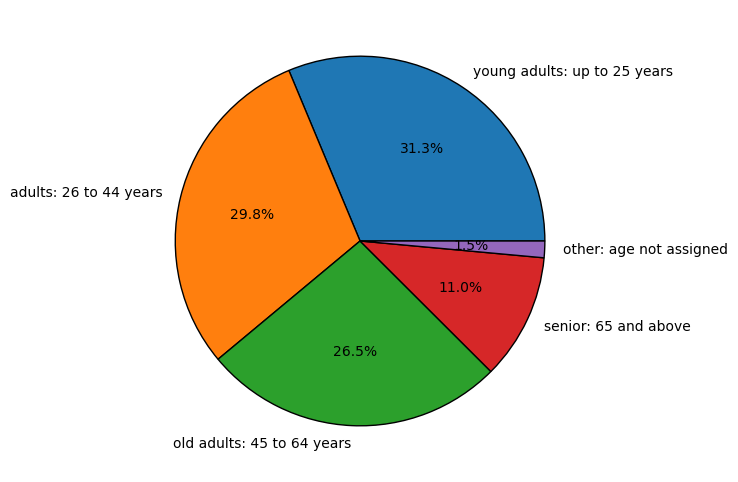

In [9]:
# Creating Pie Chart of Age Groups
age_group_counts = df_secured_excluded['age_group'].value_counts()

# Plot the pie chart
age_group_counts.plot(figsize=(6, 6))
age_group_pie_chart = age_group_counts.plot.pie(
    labels=['young adults: up to 25 years', 'adults: 26 to 44 years', 'old adults: 45 to 64 years', 'senior: 65 and above', 'other: age not assigned'],
    autopct='%.1f%%',
    wedgeprops={'edgecolor': 'black'}
)

plt.xlabel('')
plt.ylabel('')

In [13]:
age_group_pie_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Pie_chart_age_4.10.png'))

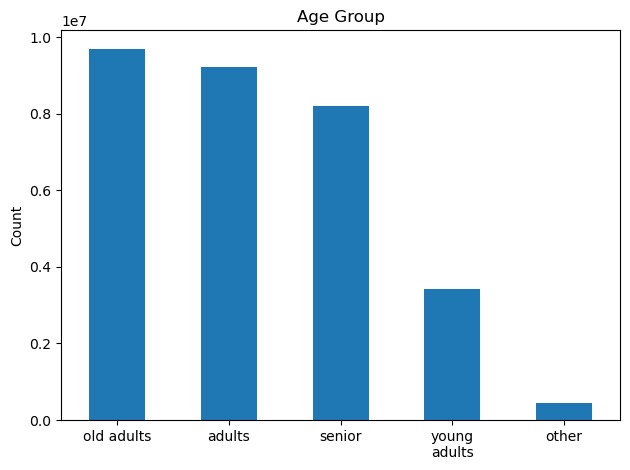

In [17]:
import matplotlib.pyplot as plt
import textwrap

# Create the bar plot
age_group_bar = age_group_counts.plot.bar()

# Add title and labels
plt.title('Age Group')
plt.xlabel('')
plt.ylabel('Count')

# Wrap the x-tick labels
labels = [label.get_text() for label in age_group_bar.get_xticklabels()]
wrapped_labels = [textwrap.fill(label, 10) for label in labels]
age_group_bar.set_xticklabels(wrapped_labels, rotation=0)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [19]:
age_group_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_chart_age_4.10.png'))

### Profiling based on income

In [23]:
income_group_bar = df_secured_excluded['income_group'].value_counts()

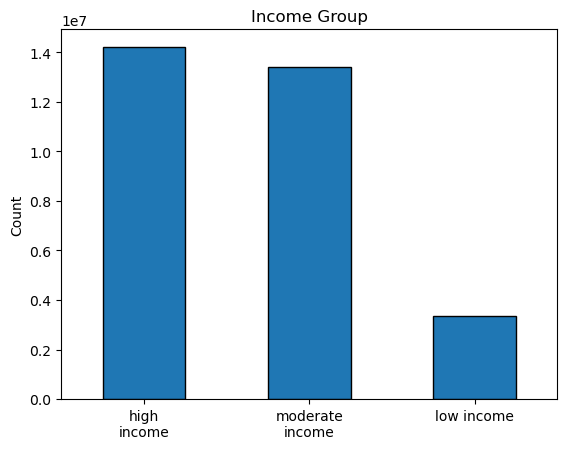

In [25]:
import textwrap

# Create the bar plot
income_group_bar = income_group_bar.plot.bar(edgecolor='black')

# Add title and labels

plt.title('Income Group')
plt.xlabel('')
plt.ylabel('Count')

# Wrap the x-tick labels
labels = [label.get_text() for label in income_group_bar.get_xticklabels()]
wrapped_labels = [textwrap.fill(label, 10) for label in labels]
income_group_bar.set_xticklabels(wrapped_labels, rotation=0)

plt.tight_layout
plt.show()

In [27]:
income_group_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_chart_income_4.10.png'))

### Profiling based on dependant

In [66]:
df_secured_excluded = df_secured_excluded.rename(columns={'number of dependants': 'dependants'})

In [67]:
result = []

for dependants in df_secured_excluded['dependants']: 
    if dependants <= 1:
        result.append('small')
    elif dependants == 2:
        result.append('medium')
    elif dependants >= 3:
        result.append('large')
    else:
        result.append('No data')

df_secured_excluded['dependants_category'] = result
df_secured_excluded['dependants_category'].value_counts()

dependants_category
small     15941736
large      8014328
medium     7975070
Name: count, dtype: int64

Text(0, 0.5, '')

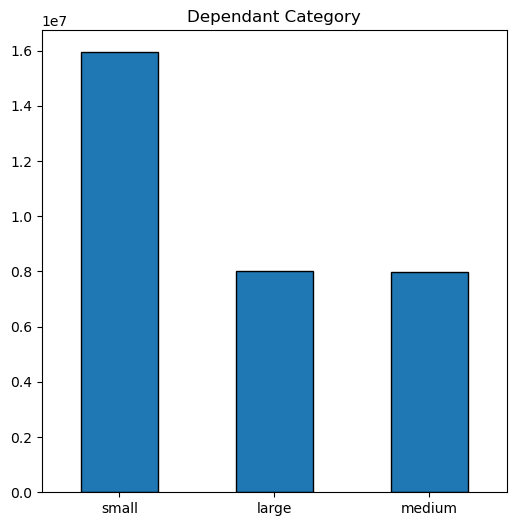

In [68]:
# Creating Bar Chart of Dependants Groups
dependants_group_counts = df_secured_excluded['dependants_category'].value_counts()
plt.figure(figsize=(6,6))
dependant_category_bar = dependants_group_counts.plot.bar(edgecolor='black', rot=0)
plt.title('Dependant Category')
plt.xlabel('')
plt.ylabel('')


In [69]:
dependant_category_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_chart_dependant_4.10.png'))

In [70]:
df_secured_excluded['order_dow'].describe()

count    3.193113e+07
mean     2.740338e+00
std      2.089910e+00
min      0.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      6.000000e+00
Name: order_dow, dtype: float64

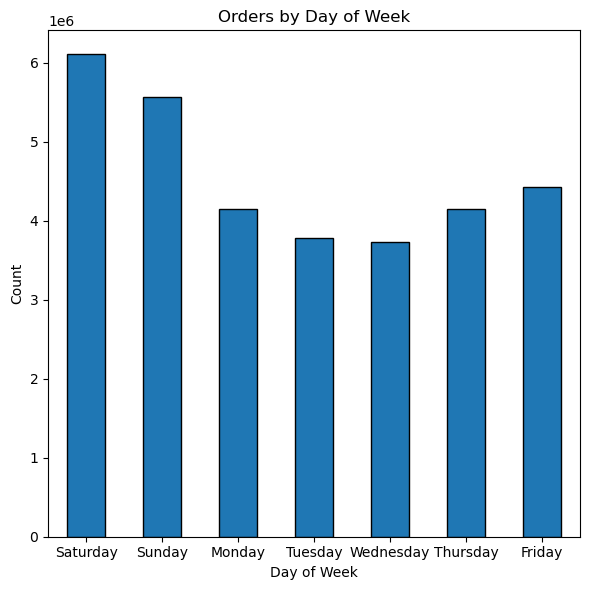

In [71]:
# Creating day names
day_names = {0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'}

# Creating Bar Chart
plt.figure(figsize=(6, 6))
ords_day_by_week = df_secured_excluded['order_dow'].value_counts().sort_index().plot.bar(edgecolor='black', rot=0)
plt.title('Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(ticks=range(7), labels=[day_names[i] for i in range(7)])
plt.tight_layout()
plt.show()

In [72]:
ords_day_by_week.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_ords_day_by_week_4.10.png'))

## Weekend/Weekday Order Analysis

In [181]:
result = []

for order_dow in df_secured_excluded['order_dow']: 
    if order_dow in [0, 1]:  # 0 and 1 represent the weekend days
        result.append('weekend')
    elif order_dow in [2, 3, 4, 5, 6]:  # 2-6 represent the weekday days
        result.append('weekday')
    else:
        result.append('No day assigned')

df_secured_excluded['order_dow_weekend'] = result
df_secured_excluded['order_dow_weekend'].value_counts()


order_dow_weekend
weekday    19644268
weekend    11320296
Name: count, dtype: int64

In [187]:
df_secured_excluded.head()

,user_id,gender,state,age,date_joined,dependants,family_status,income,product_id,product_name,...,loyalty_flag,mean_product_price,spending_flag,order_median,order_frequency,age_group,income_group,region,activity_level,order_dow_weekend
0,26711.0,Female,Missouri,48,1/1/2017,3,married,165665,196.0,Soda,...,New Customer,7.988889,Low spender,19.0,Regular customer,old adults,high income,Midwest,high activity customer,weekend
1,26711.0,Female,Missouri,48,1/1/2017,3,married,165665,196.0,Soda,...,New Customer,7.988889,Low spender,19.0,Regular customer,old adults,high income,Midwest,high activity customer,weekday
2,26711.0,Female,Missouri,48,1/1/2017,3,married,165665,196.0,Soda,...,New Customer,7.988889,Low spender,19.0,Regular customer,old adults,high income,Midwest,high activity customer,weekend
3,26711.0,Female,Missouri,48,1/1/2017,3,married,165665,6184.0,Clementines,...,New Customer,7.988889,Low spender,19.0,Regular customer,old adults,high income,Midwest,high activity customer,weekday
4,26711.0,Female,Missouri,48,1/1/2017,3,married,165665,6184.0,Clementines,...,New Customer,7.988889,Low spender,19.0,Regular customer,old adults,high income,Midwest,high activity customer,weekday


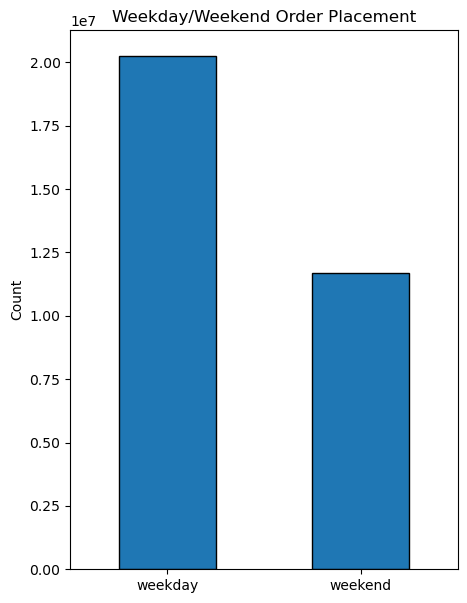

In [75]:
# Creating Bar Chart of Weekday Order Groups
order_dow_weekend_count = df_secured_excluded['order_dow_weekend'].value_counts()
plt.figure(figsize=(5,7))
order_dow_weekend_count_bar = order_dow_weekend_count.plot.bar(edgecolor='black', rot=0)
plt.title('Weekday/Weekend Order Placement')
plt.xlabel('')
plt.ylabel('Count')
plt.tight_layout
plt.show()

In [76]:
order_dow_weekend_count_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_ords_weekday_weekend_4.10.png'))

## Order by daily hour

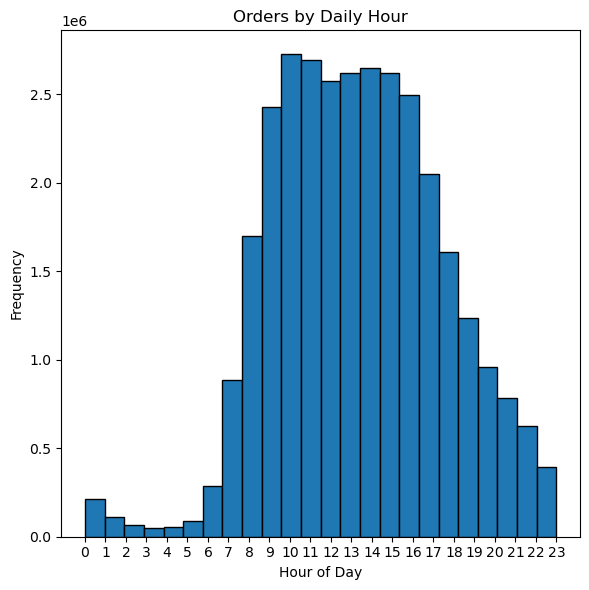

In [78]:
plt.figure(figsize=(6, 6))
ords_hour_by_day=df_secured_excluded['order_hour_of_day'].plot.hist(bins=24, edgecolor='black')
plt.title('Orders by Daily Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

In [79]:
#exporting histogram
ords_hour_by_day.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','ords_hour_by_day_hist.png'))

## Orders based on marital status

In [81]:
df_secured_excluded['family_status'].value_counts()

family_status
married                             22422624
single                               5249216
divorced/widowed                     2730657
living with parents and siblings     1528637
Name: count, dtype: int64

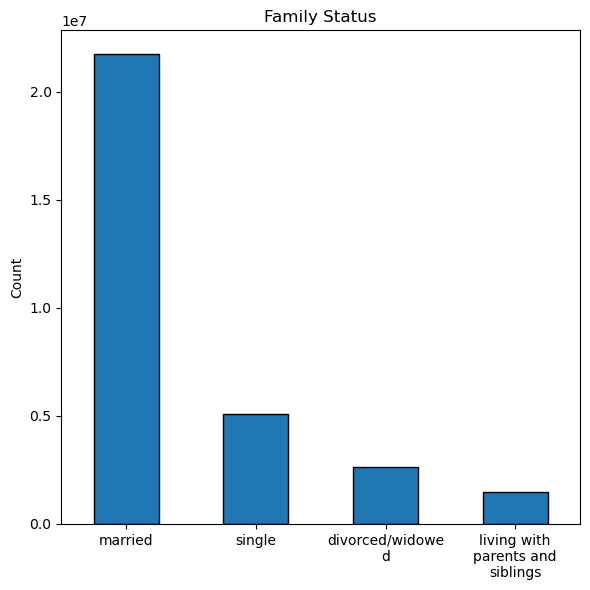

In [31]:
import textwrap

df_secured_excluded_fam_count = df_secured_excluded['family_status'].value_counts()

plt.figure(figsize=(6, 6))

# Creare the bar plot
family_status_bar = df_secured_excluded_fam_count.plot.bar(edgecolor='black')

# Add title and labels
plt.title('Family Status')
plt.xlabel('')
plt.ylabel('Count')

# Wrap the x-tick labels
labels = [label.get_text() for label in family_status_bar.get_xticklabels()]
wrapped_labels = [textwrap.fill(label, 15) for label in labels]
family_status_bar.set_xticklabels(wrapped_labels, rotation=0)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

## Family status vs age group

In [33]:
crosstab_family = pd.crosstab(df_secured_excluded['family_status'], df_secured_excluded['age_group'], dropna = False)

In [34]:
crosstab_family

age_group,adults,old adults,other,senior,young adults
family_status,,,,,
divorced/widowed,0,623313,0,2021958,0
living with parents and siblings,0,0,0,0,1481172
married,6901266,7238740,321607,6173586,1108512
single,2313185,1827998,127717,0,825510


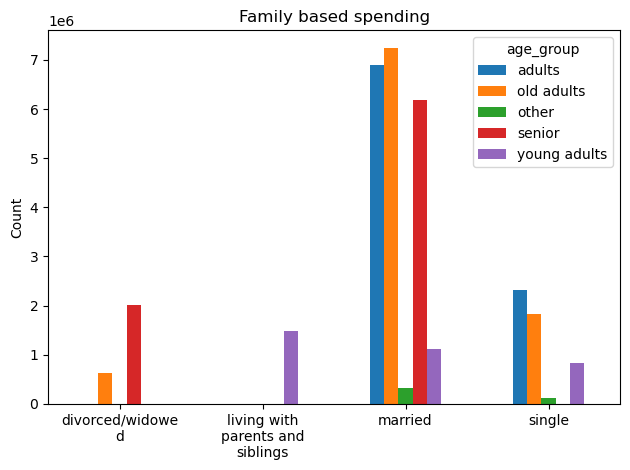

In [39]:
import textwrap

#Create the bar plot

family_based_spending = crosstab_family.plot.bar()


# Add title and labels
plt.title('Family based spending')
plt.xlabel('')
plt.ylabel('Count')

# Wrap the x-tick labels
labels = [label.get_text() for label in family_based_spending.get_xticklabels()]
wrapped_labels = [textwrap.fill(label, 15) for label in labels]
family_based_spending.set_xticklabels(wrapped_labels, rotation=0)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

Observations from family status and age_group: Highest orders come from 3 age groups and from married family status - adults, old adults and seniors. Surprisingly, orders from young adults (between age group 0 to 25) who are married are less comparitively. Their order rate remains unaffected if they were married or single.

In [41]:
#exporting the chart
family_based_spending.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','family_based_spending_4.10.png'))

## Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [43]:
df_secured_excluded.columns.to_list()

['user_id',
 'gender',
 'state',
 'age',
 'date_joined',
 'dependants',
 'family_status',
 'income',
 'product_id',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'order_id',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order',
 'add_to_cart_order',
 'reordered',
 'Average_order',
 'Max_order',
 'loyalty_flag',
 'mean_product_price',
 'spending_flag',
 'order_median',
 'order_frequency',
 'age_group',
 'income_group',
 'region',
 'activity_level']

In [45]:
df_secured_excluded.fillna({'prices': 0}, inplace=True)  # Replace NaN with 0 or handle as needed


In [47]:
df_secured_excluded['prices'] = pd.to_numeric(df_secured_excluded['prices'], errors='coerce').astype('float64')


In [55]:
# Creating aggregation subset for customer profile
customer_profile = df_secured_excluded.groupby(['user_id', 'gender', 'state', 'family_status', 'order_number', 'order_dow', 'order_hour_of_day', 'loyalty_flag', 'order_frequency', 'age_group', 'income_group', 'region', 'dependants', 'spending_flag'])['prices'].sum().reset_index()



In [56]:
customer_profile.head()

,user_id,gender,state,family_status,order_number,order_dow,order_hour_of_day,loyalty_flag,order_frequency,age_group,income_group,region,dependants,spending_flag,prices
0,1.0,Female,Alabama,married,1,2,8,New Customer,Regular customer,adults,low income,South,3,Low spender,31.600000
1,1.0,Female,Alabama,married,2,3,7,New Customer,Regular customer,adults,low income,South,3,Low spender,35.400000
2,1.0,Female,Alabama,married,3,3,12,New Customer,Regular customer,adults,low income,South,3,Low spender,28.200001
3,1.0,Female,Alabama,married,4,4,7,New Customer,Regular customer,adults,low income,South,3,Low spender,26.000000
4,1.0,Female,Alabama,married,5,4,15,New Customer,Regular customer,adults,low income,South,3,Low spender,57.000001


In [59]:
customer_agg = customer_profile.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'order_dow': ['max', 'min', 'mean'], 
                                                    'order_hour_of_day': ['max', 'min', 'mean'], 'prices': ['max', 'min', 'mean']})

In [61]:
customer_agg

order_number           order_dow               order_hour_of_day      \
                  max min  mean       max min      mean               max min   
user_id                                                                         
1.0                10   1   5.5         4   1  2.500000                16   7   
2.0                14   1   7.5         5   1  2.142857                15   9   
3.0                12   1   6.5         3   0  1.083333                19  14   
4.0                 5   1   3.0         6   4  4.800000                15  11   
7.0                20   1  10.5         6   0  1.850000                20   7   
...               ...  ..   ...       ...  ..       ...               ...  ..   
206203.0            5   1   3.0         5   0  1.800000                18  13   
206206.0           67   1  34.0         6   0  2.477612                20   9   
206207.0           16   1   8.5         6   0  2.562500                21   4   
206208.0           49   1  25.0         6   0  2.653061                23   4   
206209.0           13   1   7.0         5   0  2.769231                18  10   

                         prices                          
               mean         max         min        mean  
user_id                                                  
1.0       10.300000   63.100001   25.000000   37.570000  
2.0       10.571429  213.100000   19.000000  104.685714  
3.0       16.416667  107.200001   30.700000   60.116667  
4.0       12.600000   63.400001   10.800000   29.540000  
7.0       13.600000  166.700002    6.300000   76.910001  
...             ...         ...         ...         ...  
206203.0  15.600000  216.300002  126.600001  169.900000  
206206.0  16.731343  157.300000    9.600000   32.526866  
206207.0  12.500000  200.800003   42.800000  101.931251  
206208.0  14.265306  238.500001   38.700000  115.595919  
206209.0  13.615385  131.500001   11.100000   70.046154  

[162631 rows x 12 columns]

In [63]:
# Creating aggregation by income_group for order_number & prices
income_group_agg = customer_profile.groupby('income_group').agg({'order_number':['mean','min','max'],'prices':['mean','min','max']})

In [65]:
income_group_agg

order_number             prices                  
                        mean min max       mean  min          max
income_group                                                     
high income        18.164700   1  99  83.862662  0.0  1092.199997
low income         16.455425   1  99  52.629435  1.0   875.000007
moderate income    18.159834   1  99  81.994559  0.0   852.500001

In [69]:
# Creating aggregation by dependant_category for order_number & prices
dependant_size_agg = customer_profile.groupby('dependants').agg({'order_number':['mean','min','max'],'prices':['mean','min','max']})

In [71]:
dependant_size_agg

order_number             prices                  
                   mean min max       mean  min          max
dependants                                                  
0             18.006730   1  99  78.514072  0.0   875.000007
1             17.865611   1  99  78.791493  0.0   852.500001
2             17.844847   1  99  78.839964  0.0   846.100001
3             17.976402   1  99  78.692147  0.0  1092.199997

In [73]:
# Creating aggregation by gender for order_frequency & prices
gender_agg = customer_profile.groupby('gender').agg({'dependants':['mean','min','max'],'prices':['mean','min','max']})

In [75]:
gender_agg

dependants             prices                  
             mean min max       mean  min          max
gender                                                
Female   1.499253   0   3  78.783844  0.0  1092.199997
Male     1.502439   0   3  78.635566  0.0   875.000007

In [77]:
# Creating crosstab to compare age_group profile with region locations
age_region_comparison = pd.crosstab(df_secured_excluded['age_group'], df_secured_excluded['region'], dropna=False)

In [78]:
age_region_comparison 

region,Midwest,Northeast,South,West
age_group,,,,
adults,2172833,1602358,3092723,2346537
old adults,2286479,1697611,3194966,2510995
other,106529,77119,149853,115823
senior,1904046,1484807,2708461,2098230
young adults,791626,602790,1165136,855642


<Figure size 1000x700 with 0 Axes>

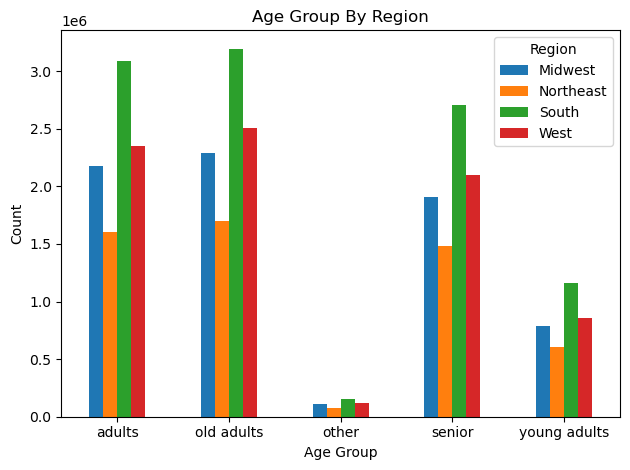

In [81]:
# Creating Bar Chart to show comparison between Age Group and Region
plt.figure(figsize=(10, 7))
age_region_comparison_bar= age_region_comparison.plot(kind='bar',rot=0)
plt.title('Age Group By Region')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [83]:
# Exporting Age Group By Region Bar Chart
age_region_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_region_comparison_bar_4.10.png'))

In [85]:
# Creating crosstab to compare age_group profile with customer frequency type
age_customer_frequency_comparison = pd.crosstab(df_secured_excluded['age_group'], df_secured_excluded['order_frequency'])

In [86]:
age_customer_frequency_comparison

order_frequency,Frequent customer,Non-frequent customer,Regular customer
age_group,,,
adults,6596786,647128,1970537
old adults,6932992,694888,2062171
other,318720,33650,96954
senior,5895127,574400,1726017
young adults,2465269,237351,712574


<Figure size 2200x1200 with 0 Axes>

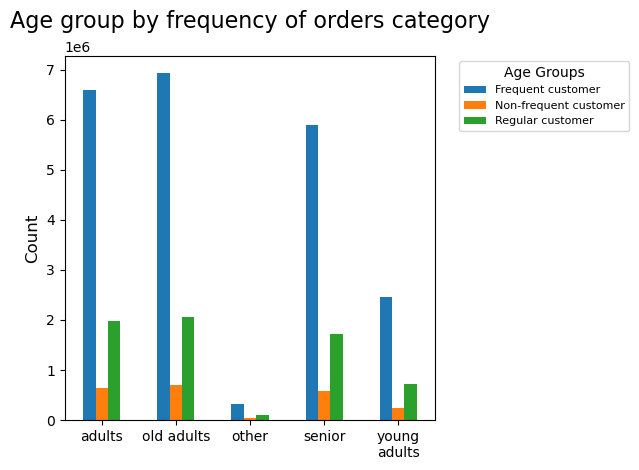

In [394]:
import textwrap

plt.figure(figsize=(22, 12))  # Increase the figure size

age_cust_freq_bar = age_customer_frequency_comparison.plot.bar()

plt.title('Age group by frequency of orders category', fontsize=16, pad=20)  # Increase title font size and padding
plt.xlabel('', fontsize=12)  # Increase x-label font size
plt.ylabel('Count', fontsize=12)  # Increase y-label font size

labels = [label.get_text() for label in age_cust_freq_bar.get_xticklabels()]
wrapped_labels = [textwrap.fill(label, 10) for label in labels]
age_cust_freq_bar.set_xticklabels(wrapped_labels, rotation=0, fontsize=10)  # Increase x-tick font size

plt.legend(title='Age Groups', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)  # Increase legend font size

plt.tight_layout()  # Adjust the layout

plt.show()


In [396]:
# Exporting Age Group By Customer Frequency Bar Chart
age_cust_freq_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','nw_age_cust_freq_bar_4.10.png'))

In [95]:
# Creating Crosstab Bewtween age_group and loyalty_flag
age_group_loyalty_comp = pd.crosstab(df_secured_excluded['age_group'], df_secured_excluded['loyalty_flag'], dropna=False)

In [96]:
age_group_loyalty_comp

loyalty_flag,Loyal Customer,New Customer,Regular Customer
age_group,,,
adults,3048175,1420508,4745768
old adults,3231509,1506670,4951872
other,136869,72781,239674
senior,2723958,1276659,4194927
young adults,1143582,527077,1744535


<Figure size 2200x1200 with 0 Axes>

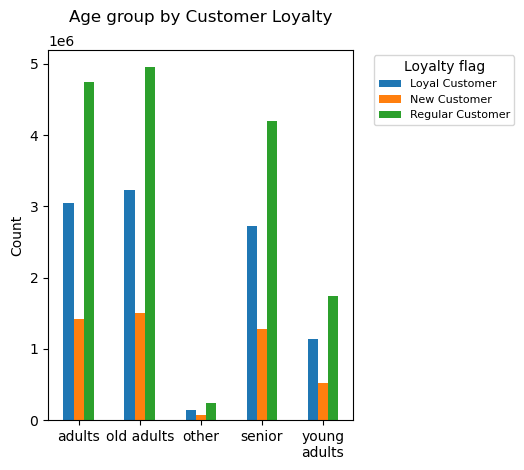

In [402]:
import textwrap

plt.figure(figsize=(22,12))
age_group_loyalty_bar = age_group_loyalty_comp.plot.bar()

plt.title('Age group by Customer Loyalty', fontsize=12, pad = 20)
plt.xlabel('')
plt.ylabel ('Count')

# Wrap the x-tick labels
labels = [label.get_text() for label in age_group_loyalty_bar.get_xticklabels()]
wrapped_labels = [textwrap.fill(label, 10) for label in labels]
age_group_loyalty_bar.set_xticklabels(wrapped_labels, rotation=0)

# Position the legend outside the plot
plt.legend(title='Loyalty flag', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

In [404]:
age_group_loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'ct_loyalty_age.png'))

In [151]:
# Creating Crosstab Bewtween income_group and region
income_region_comparison = pd.crosstab(df_secured_excluded['income_group'], df_secured_excluded['region'], dropna=False)

<Figure size 1500x1000 with 0 Axes>

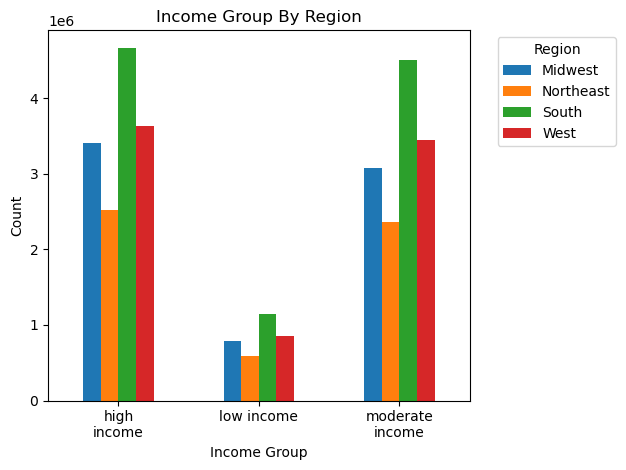

In [314]:
import textwrap

plt.figure(figsize=(15, 10))
income_region_bar = income_region_comparison.plot.bar()
plt.title('Income Group By Region')

plt.xlabel('Income Group')
plt.ylabel('Count')

# Wrap the x-tick labels
labels = [label.get_text() for label in income_region_bar.get_xticklabels()]
wrapped_labels = [textwrap.fill(label, 10) for label in labels]
income_region_bar.set_xticklabels(wrapped_labels, rotation=0)

# Position the legend outside the plot
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()

In [316]:
# Exporting Income Region Comparison Bar Chart
income_region_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','new_income_region_bar_4.10.png'))

In [318]:
# Creating Crosstab for dependant_size of customers by region
dependant_size_region_comparison = pd.crosstab(df_secured_excluded['dependants'], df_secured_excluded['region'], dropna=False)

<Figure size 1000x700 with 0 Axes>

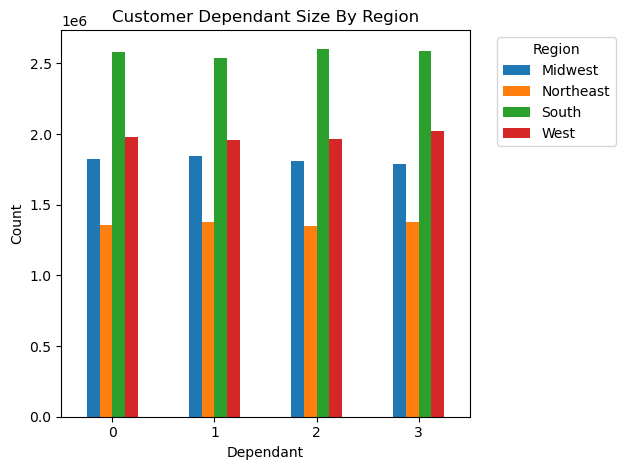

In [319]:
# Creating Bar Chart for dependant_size Group By Region Comparison
plt.figure(figsize=(10, 7))
dependants_region_bar = dependant_size_region_comparison.plot(kind='bar',rot=0)
plt.title('Customer Dependant Size By Region')
plt.xlabel('Dependant')
plt.ylabel('Count')

# Position the legend outside the plot
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [137]:
# Exporting dependant size by region Comparison Bar Chart
dependants_region_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','dependants_region_bar_4.10.png'))

In [189]:
df_secured_excluded.head()

,user_id,gender,state,age,date_joined,dependants,family_status,income,product_id,product_name,...,loyalty_flag,mean_product_price,spending_flag,order_median,order_frequency,age_group,income_group,region,activity_level,order_dow_weekend
0,26711.0,Female,Missouri,48,1/1/2017,3,married,165665,196.0,Soda,...,New Customer,7.988889,Low spender,19.0,Regular customer,old adults,high income,Midwest,high activity customer,weekend
1,26711.0,Female,Missouri,48,1/1/2017,3,married,165665,196.0,Soda,...,New Customer,7.988889,Low spender,19.0,Regular customer,old adults,high income,Midwest,high activity customer,weekday
2,26711.0,Female,Missouri,48,1/1/2017,3,married,165665,196.0,Soda,...,New Customer,7.988889,Low spender,19.0,Regular customer,old adults,high income,Midwest,high activity customer,weekend
3,26711.0,Female,Missouri,48,1/1/2017,3,married,165665,6184.0,Clementines,...,New Customer,7.988889,Low spender,19.0,Regular customer,old adults,high income,Midwest,high activity customer,weekday
4,26711.0,Female,Missouri,48,1/1/2017,3,married,165665,6184.0,Clementines,...,New Customer,7.988889,Low spender,19.0,Regular customer,old adults,high income,Midwest,high activity customer,weekday


In [191]:
# Creating Crosstab for Weekday Order placement by Region
week_day_category_region_comparison = pd.crosstab(df_secured_excluded['order_dow_weekend'], df_secured_excluded['region'], dropna=False)

In [192]:
week_day_category_region_comparison

region,Midwest,Northeast,South,West
order_dow_weekend,,,,
weekday,4607669,3466655,6547439,5022505
weekend,2653844,1998030,3763700,2904722


<Figure size 1000x700 with 0 Axes>

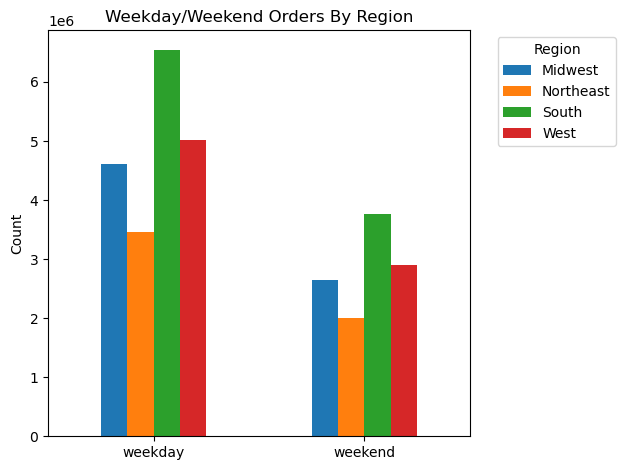

In [205]:
# Creating Bar Chart for Weekday Order Group By Region Comparison
import textwrap

plt.figure(figsize=(10, 7))
week_day_category_region_comparison_bar = week_day_category_region_comparison.plot(kind='bar',rot=0)
plt.title('Weekday/Weekend Orders By Region')
plt.xlabel('')
plt.ylabel('Count')

# Position the legend outside the plot
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [207]:
# Exporting Weekday Orders Placement by Region Comparison Bar Chart
week_day_category_region_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','week_day_category_region_comparison_bar_4.10.png'))


In [209]:
df_secured_excluded['order_frequency'].value_counts()

order_frequency
Frequent customer        22208894
Regular customer          6568253
Non-frequent customer     2187417
Name: count, dtype: int64

In [210]:
# Creating crosstab to compare region with customer frequency type
region_customer_frequency_comparison = pd.crosstab(df_secured_excluded['region'], df_secured_excluded['order_frequency'])

<Figure size 1000x700 with 0 Axes>

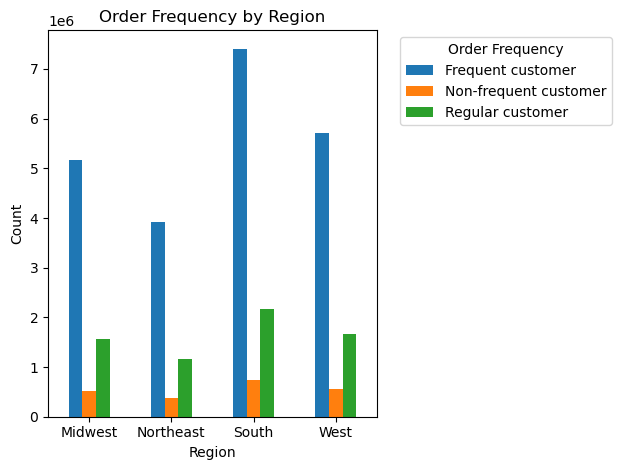

In [215]:
# Creating Bar Chart for region By customer frequency Comparison

import textwrap

plt.figure(figsize=(10, 7))
region_customer_frequency_comparison_bar = region_customer_frequency_comparison.plot(kind='bar', rot=0)
plt.title('Order Frequency by Region')
plt.xlabel('Region')
plt.ylabel('Count')

# Position the legend outside the plot
plt.legend(title='Order Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [217]:
# Exporting Region by Customer Frequency Chart
region_customer_frequency_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','region_customer_frequency_comparison_bar_4.10.png'))


In [219]:
# Creating crosstab to compare region with type_of_spender
region_type_of_spender_comparison = pd.crosstab(df_secured_excluded['region'], df_secured_excluded['spending_flag'], dropna=False)

<Figure size 1000x700 with 0 Axes>

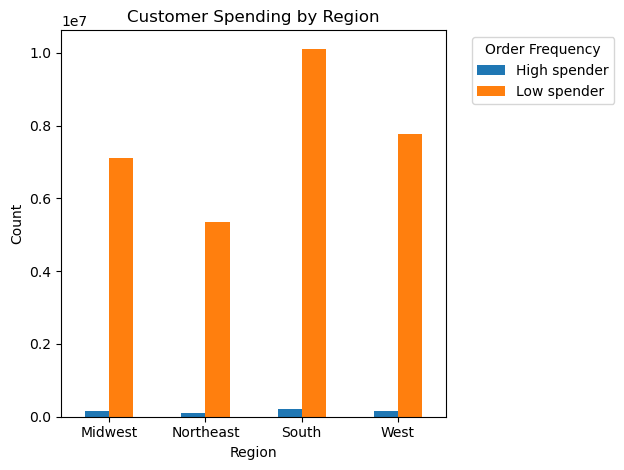

In [326]:
# Creating Bar Chart for region By type of spender
import textwrap

plt.figure(figsize=(10, 7))
region_type_of_spender_comparison_bar = region_type_of_spender_comparison.plot(kind='bar', rot=0)
plt.title('Customer Spending by Region')
plt.xlabel('Region')
plt.ylabel('Count')

# Position the legend outside the plot
plt.legend(title='Order Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()

In [328]:
# Exporting Bar Chart for region by type of customer spender
region_type_of_spender_comparison_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','region_type_of_spender_comparison_bar_4.10.png'))


## Profiles Compared with Departments

In [228]:
#Importing department wrangled dataframe
df_dept = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col=False)

In [230]:
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [232]:
df_dept.rename(columns = {'Unnamed: 0': 'department_id'}, inplace = True)

In [234]:
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [236]:
df_dept.dtypes

department_id     int64
department       object
dtype: object

In [238]:
# Changing department_id from int64 to str for merge
df_dept['department_id'] = df_dept['department_id'].astype('float64')

In [240]:
df_secured_excluded.columns.to_list()

['user_id',
 'gender',
 'state',
 'age',
 'date_joined',
 'dependants',
 'family_status',
 'income',
 'product_id',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'order_id',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order',
 'add_to_cart_order',
 'reordered',
 'Average_order',
 'Max_order',
 'loyalty_flag',
 'mean_product_price',
 'spending_flag',
 'order_median',
 'order_frequency',
 'age_group',
 'income_group',
 'region',
 'activity_level',
 'order_dow_weekend']

In [248]:
df_secured_excluded.shape

(30964564, 32)

In [250]:
df_final_dept = df_secured_excluded.merge(df_dept, on='department_id', indicator=True)

In [251]:
df_final_dept

,user_id,gender,state,age,date_joined,dependants,family_status,income,product_id,product_name,...,spending_flag,order_median,order_frequency,age_group,income_group,region,activity_level,order_dow_weekend,department,_merge
0,26711.0,Female,Missouri,48,1/1/2017,3,married,165665,196.0,Soda,...,Low spender,19.0,Regular customer,old adults,high income,Midwest,high activity customer,weekend,beverages,both
1,26711.0,Female,Missouri,48,1/1/2017,3,married,165665,196.0,Soda,...,Low spender,19.0,Regular customer,old adults,high income,Midwest,high activity customer,weekday,beverages,both
2,26711.0,Female,Missouri,48,1/1/2017,3,married,165665,196.0,Soda,...,Low spender,19.0,Regular customer,old adults,high income,Midwest,high activity customer,weekend,beverages,both
3,26711.0,Female,Missouri,48,1/1/2017,3,married,165665,6184.0,Clementines,...,Low spender,19.0,Regular customer,old adults,high income,Midwest,high activity customer,weekday,produce,both
4,26711.0,Female,Missouri,48,1/1/2017,3,married,165665,6184.0,Clementines,...,Low spender,19.0,Regular customer,old adults,high income,Midwest,high activity customer,weekday,produce,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30964559,135902.0,Female,Missouri,66,4/1/2020,2,married,53374,44801.0,Fresh Mint Toothpaste,...,Low spender,8.0,Frequent customer,senior,moderate income,Midwest,high activity customer,weekend,personal care,both
30964560,135902.0,Female,Missouri,66,4/1/2020,2,married,53374,44801.0,Fresh Mint Toothpaste,...,Low spender,8.0,Frequent customer,senior,moderate income,Midwest,high activity customer,weekday,personal care,both
30964561,135902.0,Female,Missouri,66,4/1/2020,2,married,53374,44801.0,Fresh Mint Toothpaste,...,Low spender,8.0,Frequent customer,senior,moderate income,Midwest,high activity customer,weekday,personal care,both
30964562,135902.0,Female,Missouri,66,4/1/2020,2,married,53374,47115.0,Favorites Super Moist Butter Recipe Yellow Cak...,...,Low spender,8.0,Frequent customer,senior,moderate income,Midwest,high activity customer,weekday,pantry,both


In [252]:
# Dropping merge column
df_final_dept = df_final_dept.drop(columns=['_merge'])

In [253]:
# Exporting new dataframe with department merged to main dataframe
df_final_dept.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_customer_department_merge.pkl'))

In [258]:
df_final_dept['department'].value_counts()

department
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

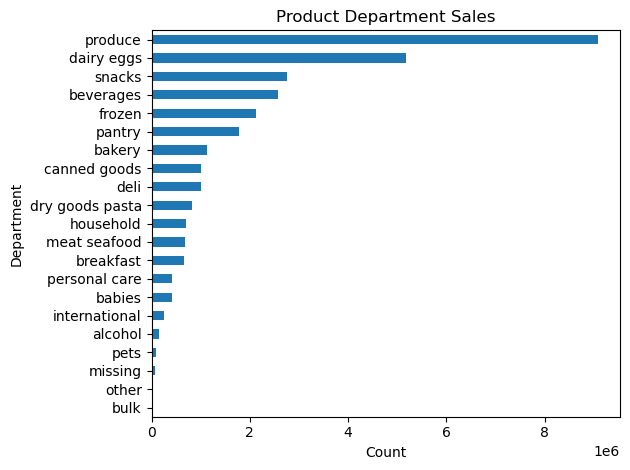

In [260]:
# Creating department bar chart
dept_bar = df_final_dept['department'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Product Department Sales')
plt.xlabel('Count')
plt.ylabel('Department')
plt.tight_layout()

In [262]:
# Exporting Department Bar Chart
dept_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','department_product_bar.png'))

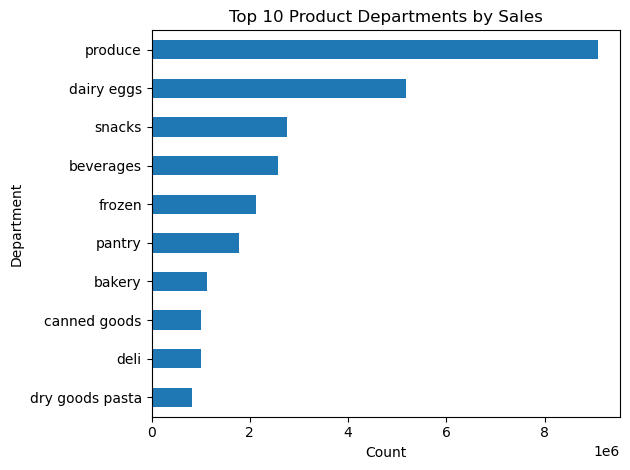

In [332]:
# Creating top 10 departments bar chart
top_10_departments = df_final_dept['department'].value_counts().nlargest(10).sort_values(ascending=True)

dept_bar_10 = top_10_departments.plot(kind='barh')
plt.title('Top 10 Product Departments by Sales')
plt.xlabel('Count')
plt.ylabel('Department')
plt.tight_layout()
plt.show()

In [334]:
# Exporting Department Bar Chart
dept_bar_10.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','department_Top10_bar.png'))

In [264]:
# Creating crosstab to compare age_group profile with departments
age_dept_comparison = pd.crosstab(df_final_dept['age_group'], df_final_dept['department'], dropna = False) 


In [266]:
age_dept_comparison

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_group,,,,,,,,,,,,,,,,,,,,,
adults,42167,123044,334154,754851,198803,9902,302479,1549127,299970,243702,...,207553,76675,199124,19130,10198,529307,125522,27034,2712590,824677
old adults,46579,129910,350804,814687,211274,10298,315774,1612490,314110,256920,...,218860,79743,209927,20340,10811,558929,134736,28293,2830853,867564
other,1711,5409,16291,39087,10029,539,14718,74341,14583,12463,...,9795,3764,9343,944,533,25385,6462,1314,128398,42413
senior,36693,106204,295997,684020,175296,8945,267509,1368072,265199,217316,...,186630,67199,181150,16915,8946,472383,111052,25115,2408104,728549
young adults,17477,45825,123582,279256,75448,3767,111594,573152,109972,91735,...,77019,28610,75237,7439,3923,196701,46534,11304,999328,303203


<Figure size 2500x2500 with 0 Axes>

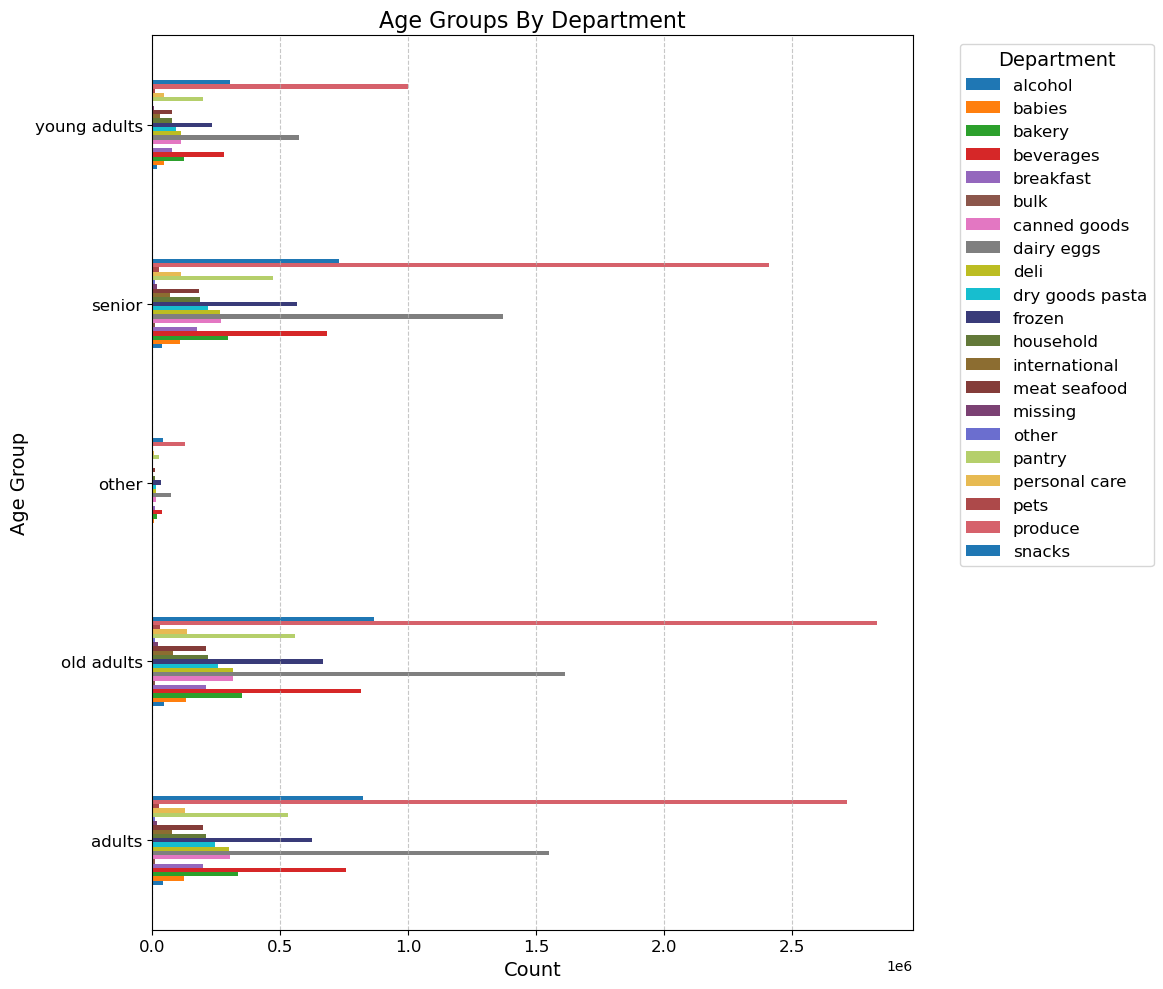

In [268]:
# Define a custom color palette with distinct colors
custom_colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#393b79', '#637939', '#8c6d31', '#843c39', '#7b4173',
    '#6b6ecf', '#b5cf6b', '#e7ba52', '#ad494a', '#d6616b'
]

plt.figure(figsize=(25, 25))
age_dept_comparison_bar = age_dept_comparison.plot(kind='barh', figsize=(14, 10), color=custom_colors, rot=0)

# Add title and labels with larger font size
plt.title('Age Groups By Department', fontsize=16)
plt.xlabel('Count', fontsize = 14)
plt.ylabel('Age Group', fontsize = 14)

# Increase font size for ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

# Add gridlines
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Adjust layout to make room for legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

In [270]:
# Exporting Age Group by Department Bar Chart
age_dept_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_department_comparison_bar_4.10.png'))

In [272]:
# Creating crosstab to compare income_group profile with departments
income_group_dept_comparison = pd.crosstab(df_final_dept['income_group'], df_final_dept['department'], dropna=False)


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (10).

<Figure size 1000x800 with 0 Axes>

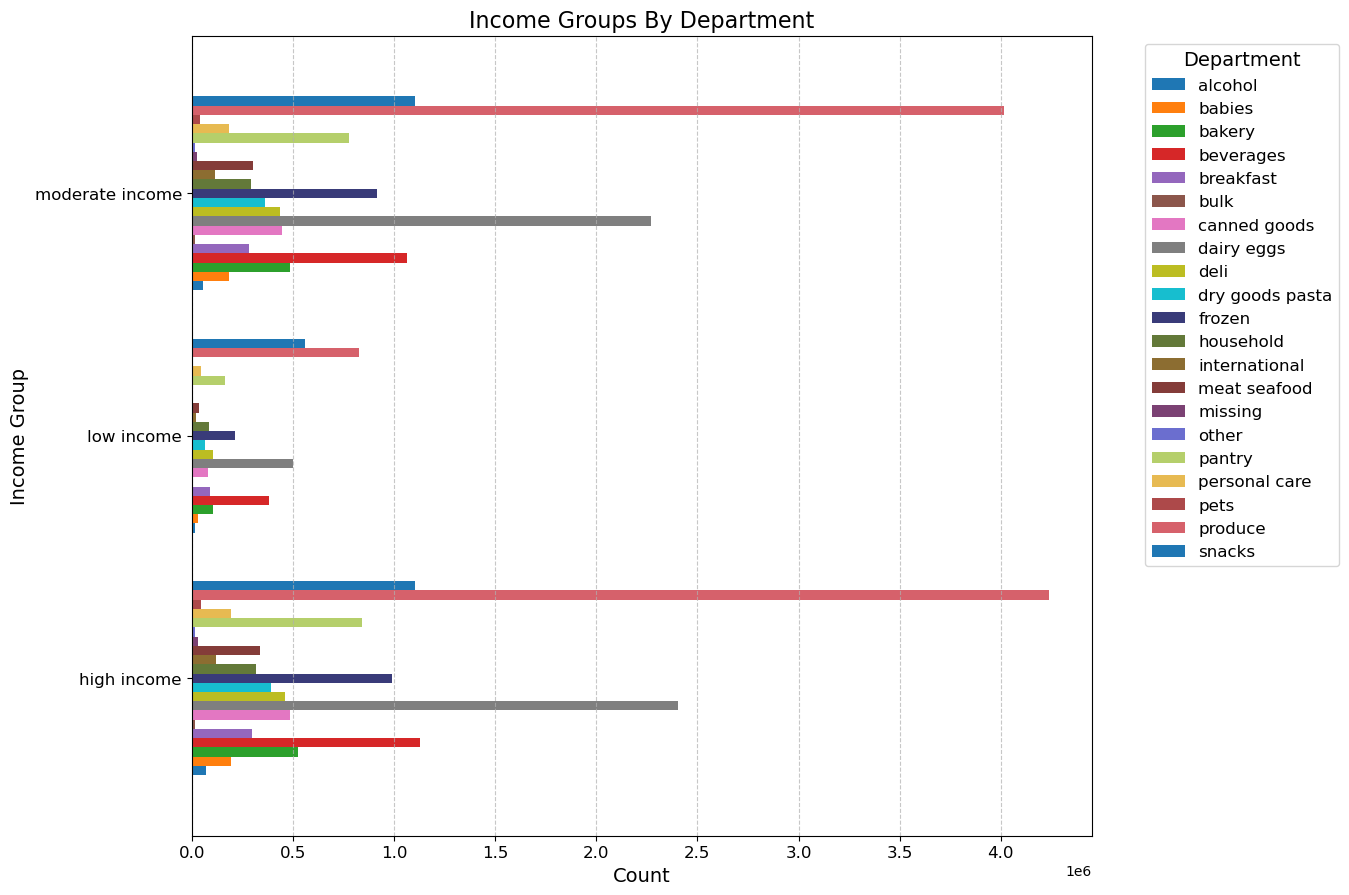

In [350]:
import textwrap

# Define a custom color palette with distinct colors
custom_colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#393b79', '#637939', '#8c6d31', '#843c39', '#7b4173',
    '#6b6ecf', '#b5cf6b', '#e7ba52', '#ad494a', '#d6616b'
]

# Create a bar chart with custom colors
plt.figure(figsize=(10, 8))
income_group_department_comparison_bar = income_group_dept_comparison.plot(
    kind='barh',
    figsize=(15, 20),
    color=custom_colors,
    rot=0,
    width=0.8
)

# Add title and labels with larger font size
plt.title('Income Groups By Department', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Income Group', fontsize=14)

# Increase font size for ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)


# Add gridlines
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Adjust layout to make room for legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Reduce margins
plt.subplots_adjust(left=0.2, right=0.8, top=0.6, bottom=0.2)

# Wrap the x-tick labels
labels = [label.get_text() for label in income_group_department_comparison_bar.get_xticklabels()]
wrapped_labels = [textwrap.fill(label, 10) for label in labels]
income_group_department_comparison_bar.set_yticklabels(wrapped_labels, rotation=0)



plt.show()

In [352]:
# Exporting Income Groups By Department Comparison Bar Chart
income_group_department_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_group_department_comparison_bar.png'))


In [282]:
# Creating crosstab to compare regions with departments
region_dept_comparison = pd.crosstab(df_final_dept['region'], df_final_dept['department'], dropna = False)

<Figure size 1000x800 with 0 Axes>

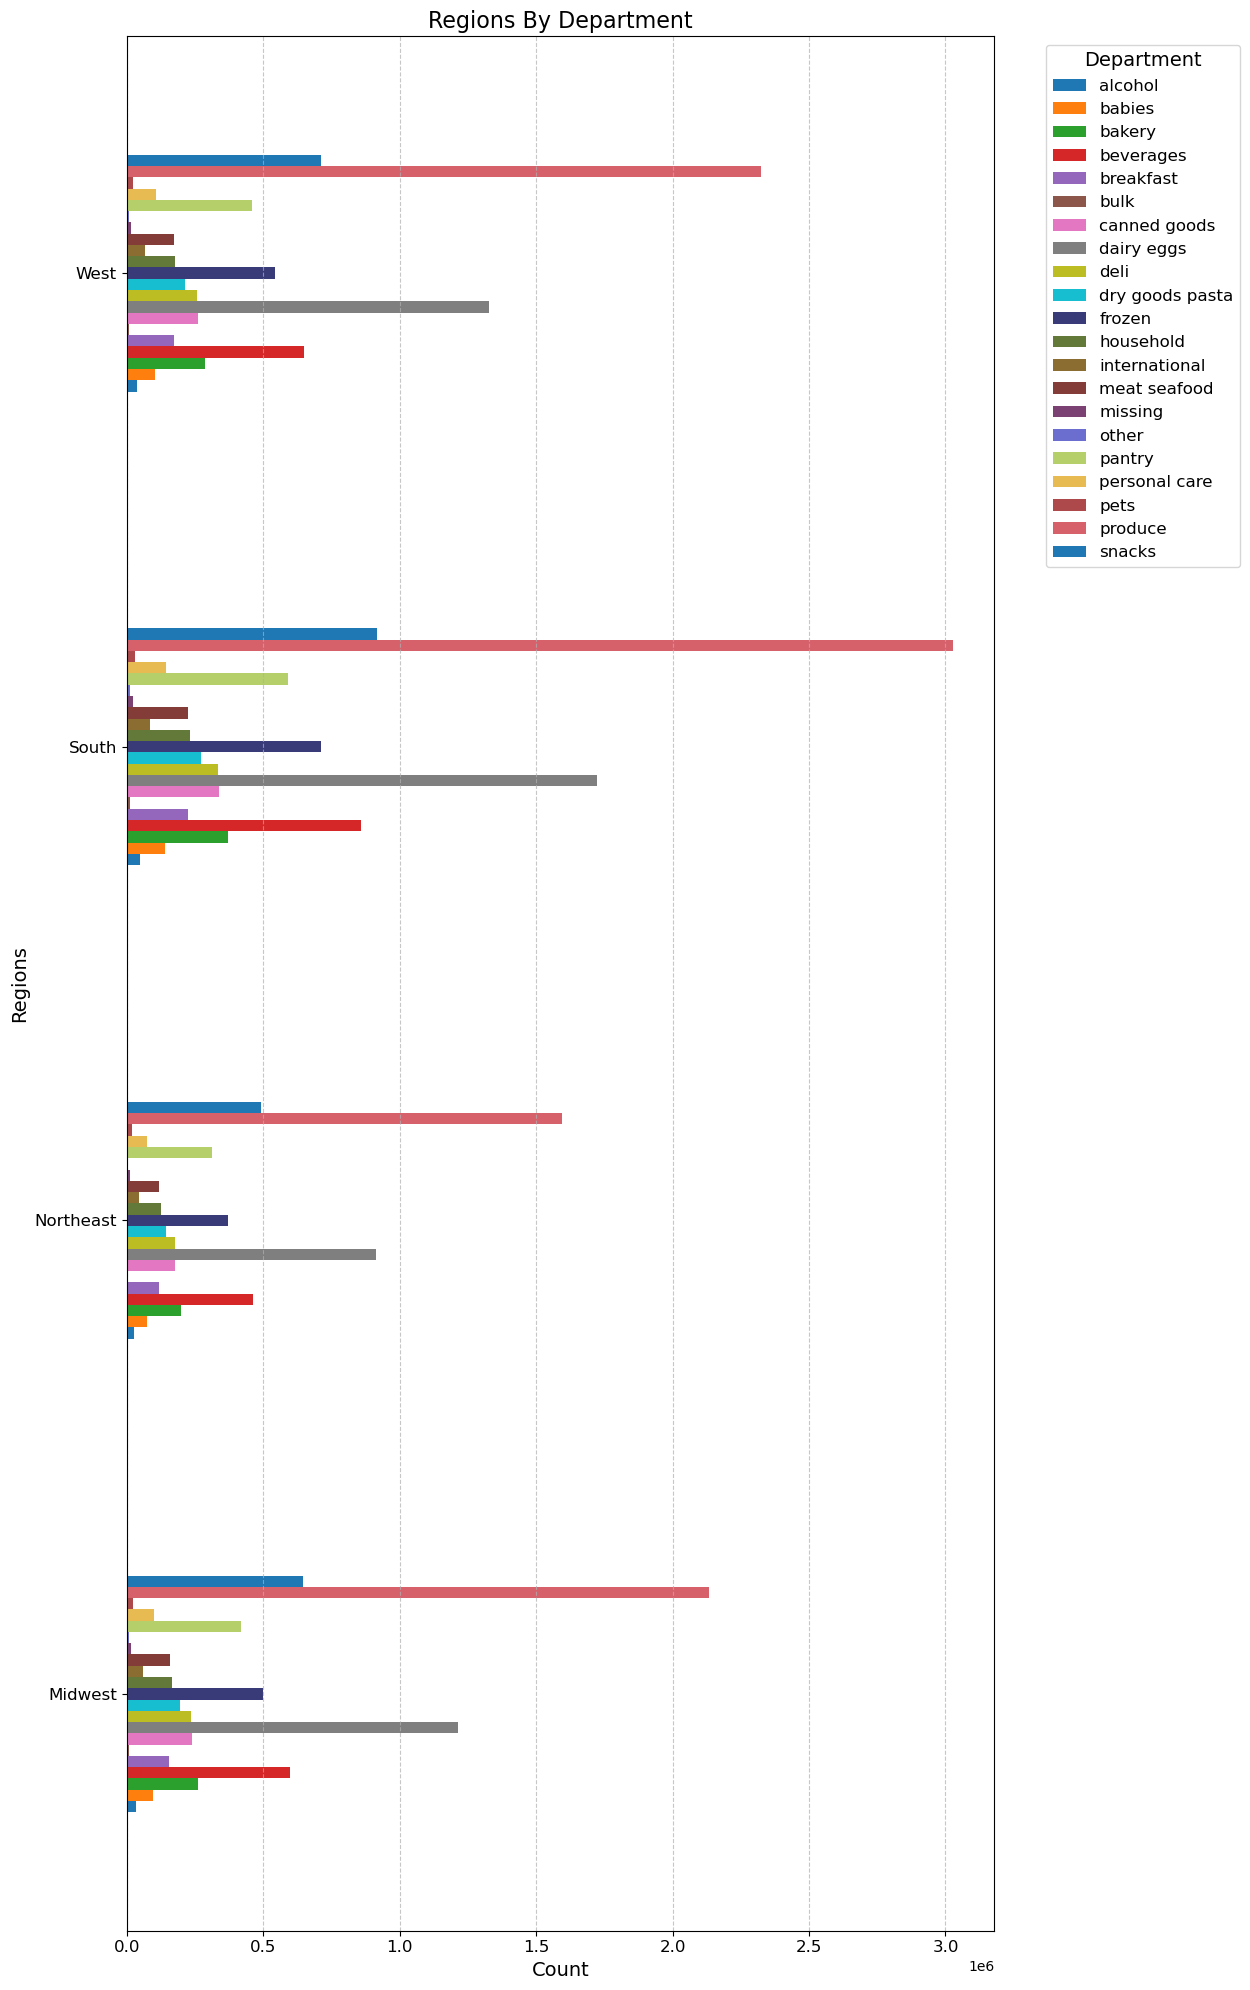

In [342]:
# Define a custom color palette with distinct colors
custom_colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#393b79', '#637939', '#8c6d31', '#843c39', '#7b4173',
    '#6b6ecf', '#b5cf6b', '#e7ba52', '#ad494a', '#d6616b'
]

plt.figure(figsize=(10, 8))
region_dept_comparison_bar = region_dept_comparison.plot(kind='barh', figsize=(15, 20), color = custom_colors, rot=0)

# Add title and labels with larger font size
plt.title('Regions By Department', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Regions', fontsize=14)

# Increase font size for ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

# Add gridlines
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Adjust layout to make room for legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

In [354]:
# Exporting Regions by Department Bar Chart
region_dept_comparison_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','region_dept_comp_bar_4.10.png'))

Graphs for Project Analysis

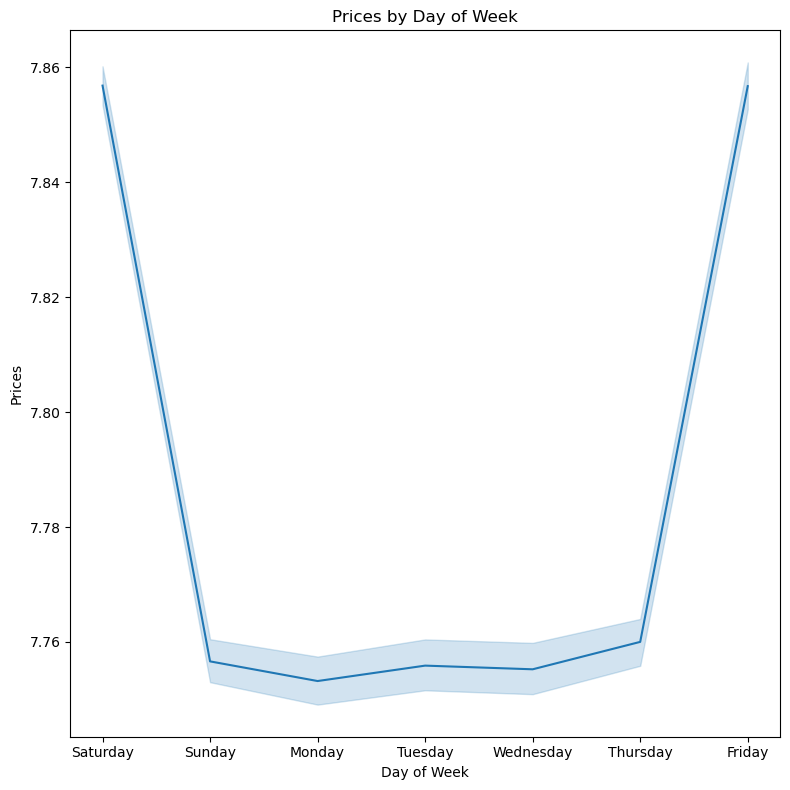

In [288]:
# Creating reference day names
day_names = {0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'}

# Creating Line Chart
plt.figure(figsize=(8, 8))
prices_by_day_of_week_line = sns.lineplot(data = df_secured_excluded, x= 'order_dow', y='prices')
plt.title('Prices by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Prices')
plt.xticks(ticks=range(7), labels=[day_names[i] for i in range(7)])
plt.tight_layout()
plt.show()

In [289]:
# Exporting Prices by Day of Week Line Graph
prices_by_day_of_week_line.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','prices_by_day_of_week_line_4.10.png'))

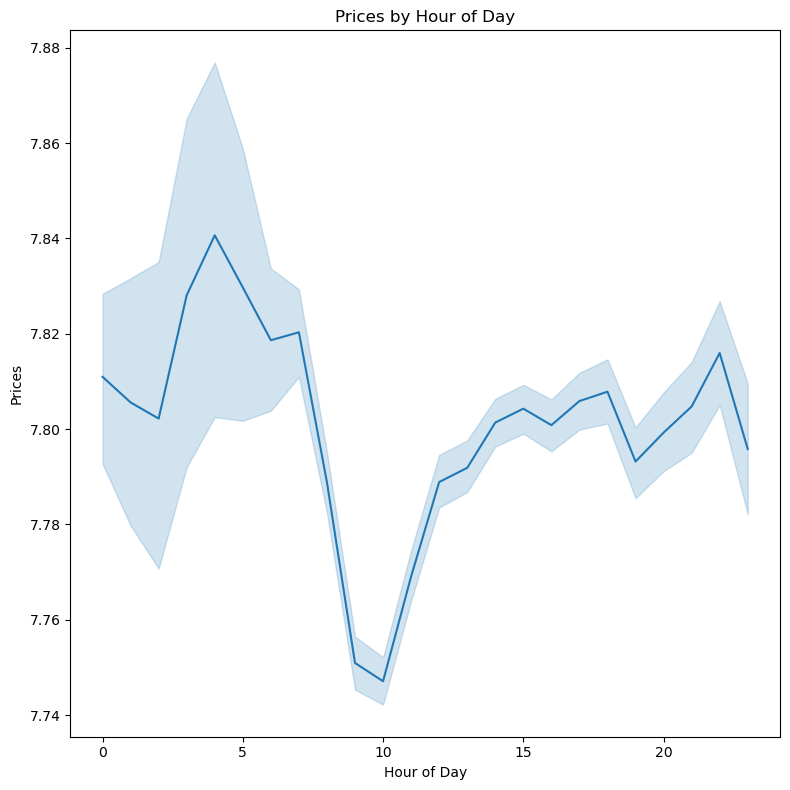

In [290]:
# Prices by hour of day
plt.figure(figsize = (8, 8))
prices_by_order_hour_of_day_line = sns.lineplot(data = df_secured_excluded, x = 'order_hour_of_day', y = 'prices')
plt.title('Prices by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Prices')
plt.tight_layout()
plt.show()

In [291]:
# Exporting Prices by Hour of Day
prices_by_order_hour_of_day_line.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','prices_by_order_hour_of_day_line_4.10.png'))

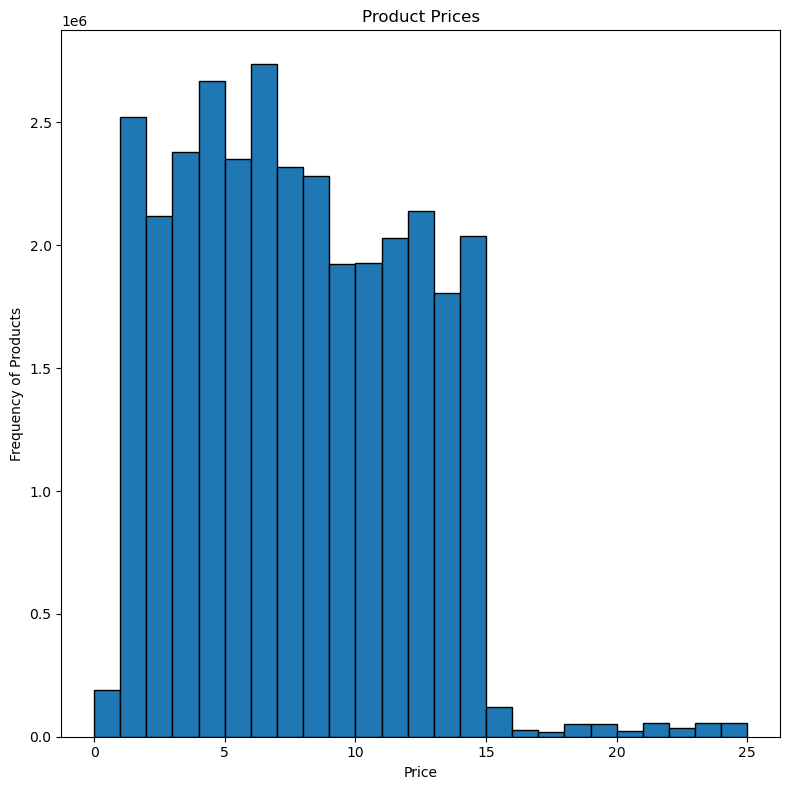

In [379]:
# Histogram of product prices
plt.figure(figsize = (8, 8))
prod_price_hist = df_secured_excluded['prices'].plot.hist(bins = 25, edgecolor = 'black')
plt.title('Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency of Products')
plt.tight_layout()
plt.show()

In [383]:
# Exporting Product Pricing Histogram
prod_price_hist.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','prod_price_hist.png'))

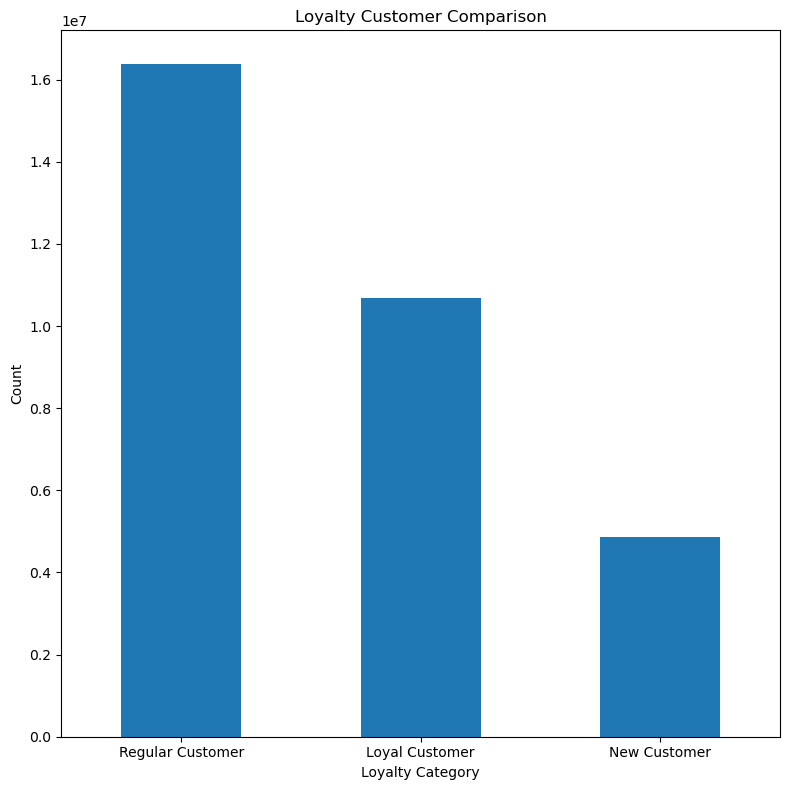

In [385]:
# Creating bar chart for customer loyalty breakdown
plt.figure(figsize = (8,8))
loyalty_customer_comparison_bar = df_secured_excluded['loyalty_flag'].value_counts().plot(kind = 'bar', rot = 0)
plt.title('Loyalty Customer Comparison')
plt.xlabel('Loyalty Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [387]:
# Exporting Loyalty Customer Comparison Bar Chart
loyalty_customer_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','loyalty_customer_comparison_bar_4.10.png'))

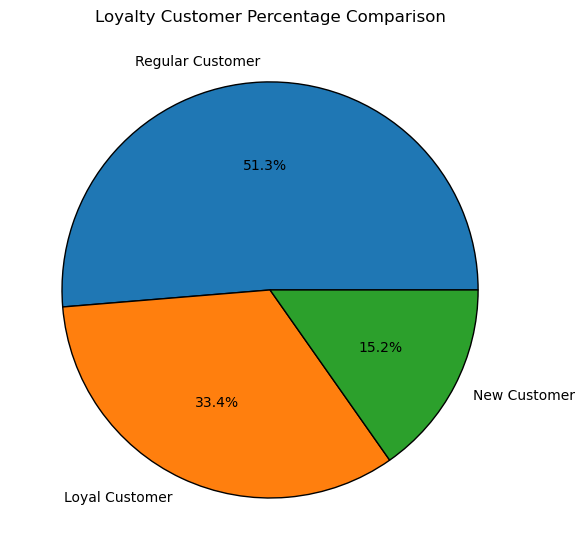

In [391]:
# Creating Pie Chart of customer loyalty breakdown
loyalty_customer_pie = df_secured_excluded['loyalty_flag'].value_counts()
plt.figure(figsize = (6,6))
loyalty_customer_comparison_pie = loyalty_customer_pie.plot.pie(autopct = '%.1f%%', wedgeprops = {'edgecolor':'black'})
plt.title('Loyalty Customer Percentage Comparison')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [395]:
loyalty_customer_comparison_pie.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','loyalty_customer_comparison_pie.png'))

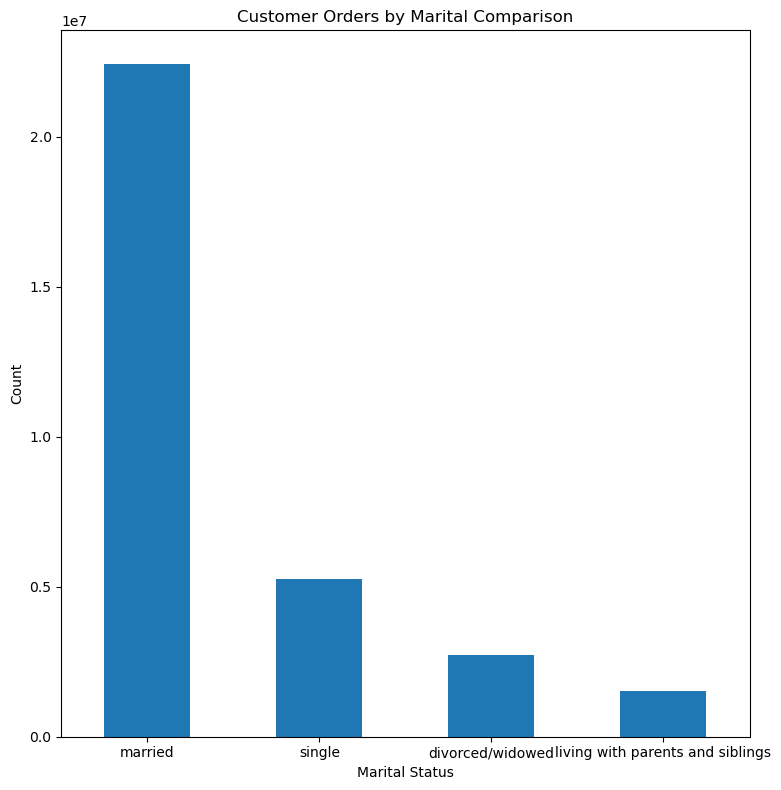

In [399]:
# Creating bar chart for customer marital status breakdown
plt.figure(figsize = (8,8))
marital_status_comparison_bar = df_secured_excluded['family_status'].value_counts().plot(kind = 'bar', rot=0)
plt.title('Customer Orders by Marital Comparison')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [401]:
# Export bar chart of customer marital status orders
marital_status_comparison_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','marital_status_comparison_bar_4.10.png'))

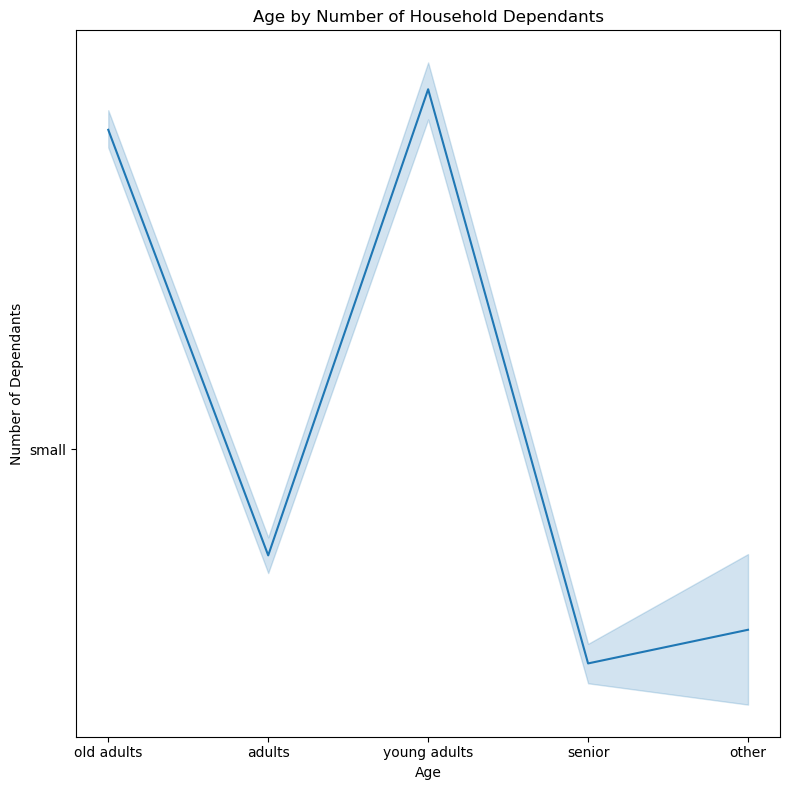

In [411]:
# Creating Line Chart age by num_of_dependants comparison
plt.figure(figsize = (8, 8))
age_by_dependants_line = sns.lineplot(data = df_secured_excluded, x = 'age_group', y = 'dependants_category')
plt.title('Age by Number of Household Dependants')
plt.xlabel('Age')
plt.ylabel('Number of Dependants')
plt.tight_layout()
plt.show()

In [413]:
# Exporting line chart age by num_of_dependants comparison
age_by_dependants_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_by_dependants_line_4.10.png'))